# BASEBALL PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
d=pd.read_csv('baseball.csv')

In [3]:
d.count()

W      30
R      30
AB     30
H      30
2B     30
3B     30
HR     30
BB     30
SO     30
SB     30
RA     30
ER     30
ERA    30
CG     30
SHO    30
SV     30
E      30
dtype: int64

In [4]:
d.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
d.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
d.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


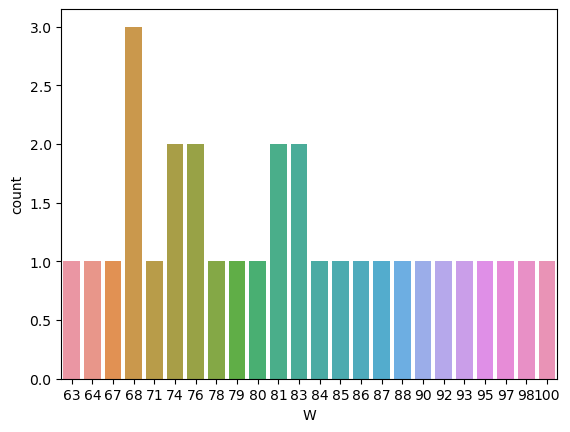

In [9]:
sns.countplot(x='W', data=d);

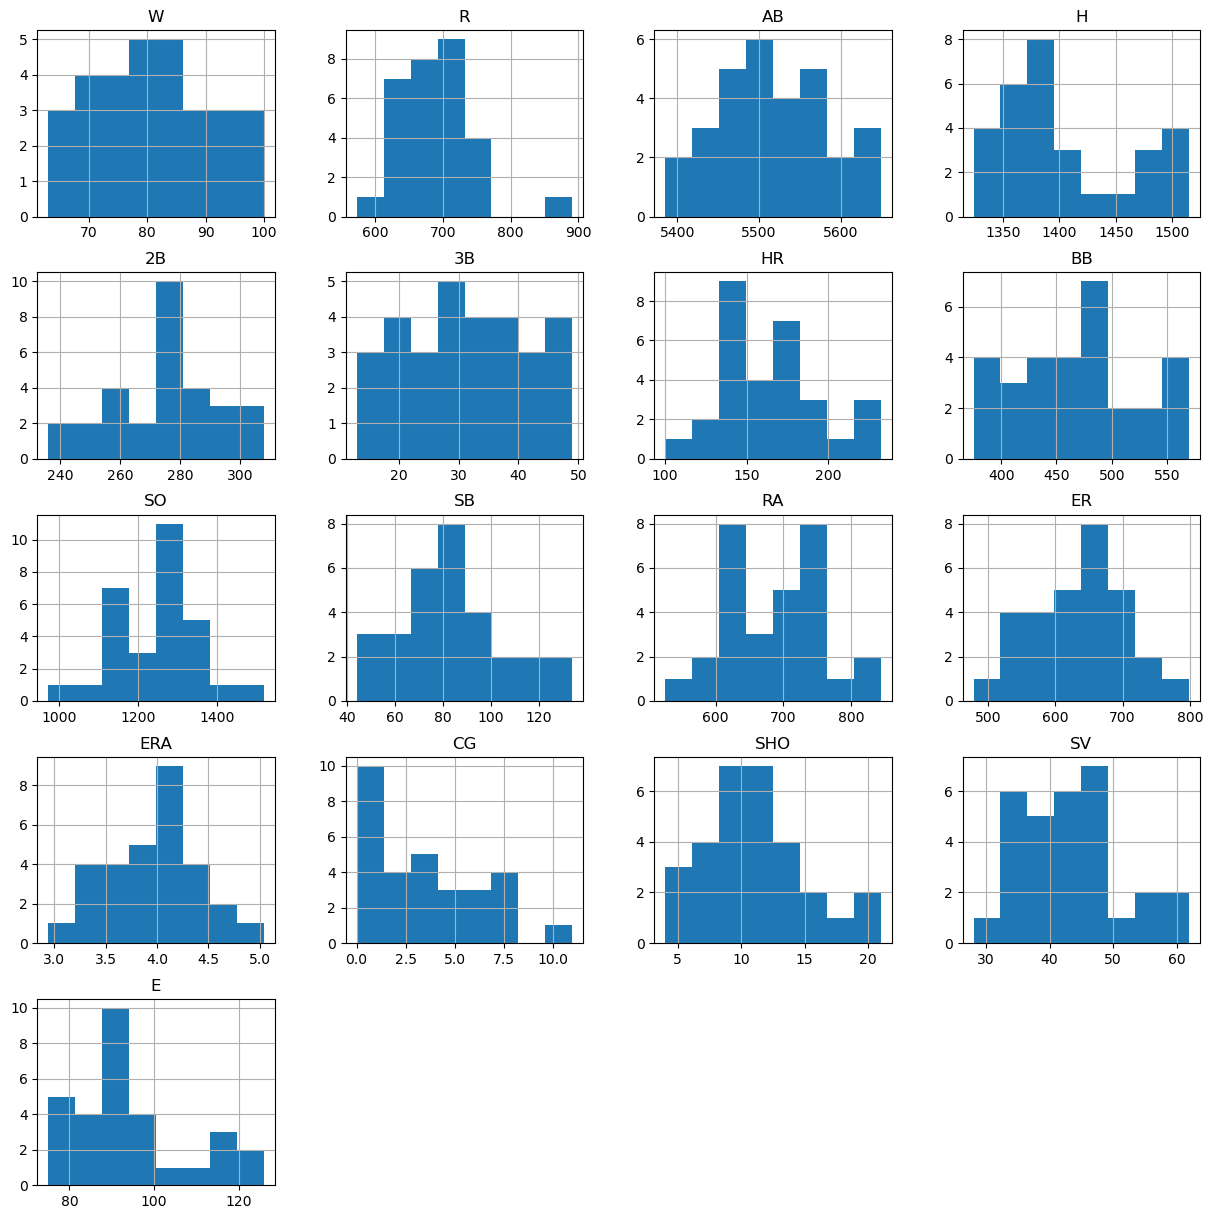

In [10]:
d.hist(bins=8,figsize=(15,15));

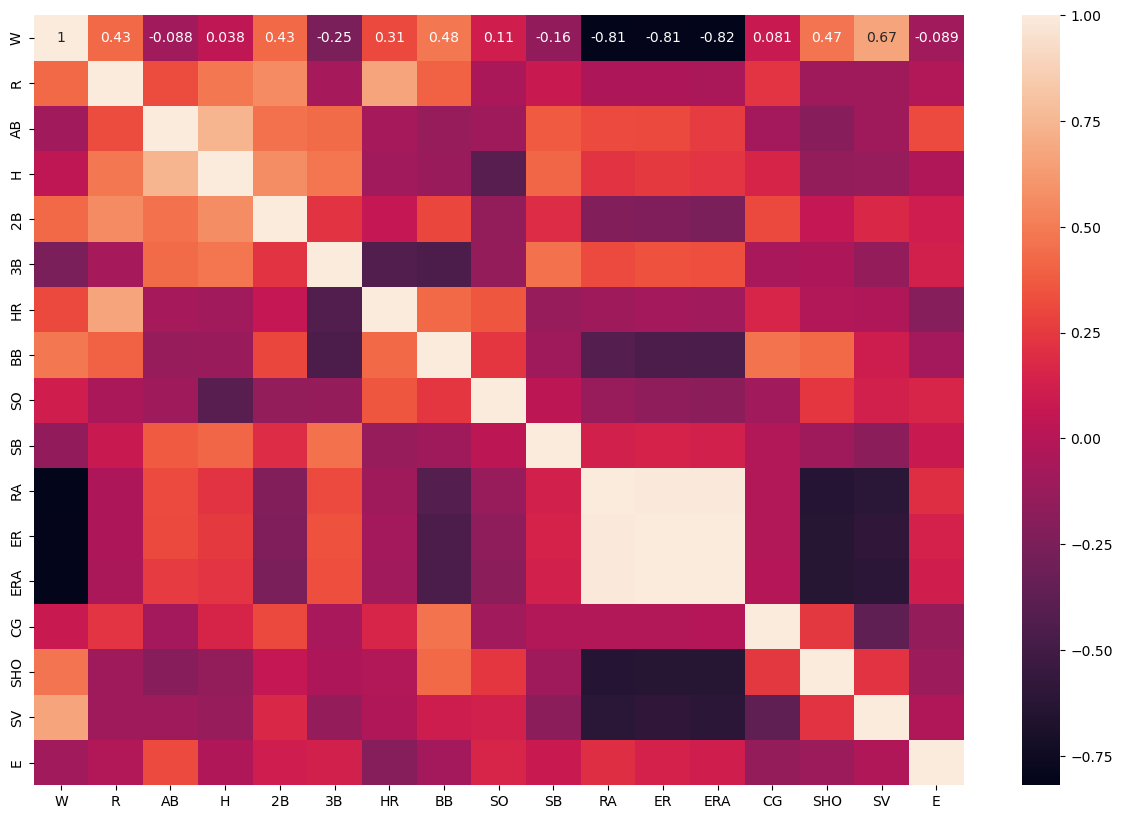

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(d.corr(numeric_only=True), annot=True);

In [14]:
d_skew = d.skew()
d_skew

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [19]:
x = d.drop(['W'], axis=1)
y = d[['W']]

In [20]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [22]:
x = x.drop(['ERA'], axis=1)

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

In [27]:
from sklearn.linear_model import Ridge
r_clf = Ridge(random_state = 39)

In [28]:
r_clf.fit(xtrain,ytrain)

Ridge(random_state=39)

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_param = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 
              'fit_intercept': [True,False], 
              'copy_X': [True , False], 
              'tol':[0.0001,0.001,0.01,0.1,1,10]}

In [30]:
grid_search = GridSearchCV(estimator=r_clf, param_grid=grid_param, cv=2, verbose=3)

In [31]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=0.493 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=-0.839 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=0.493 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=-0.839 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=0.493 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=-0.839 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=0.493 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=-0.839 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=1;, score=0.493 total time=   0.0s
[CV 2/2] END a

GridSearchCV(cv=2, estimator=Ridge(random_state=39),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=3)

In [35]:
d2= Ridge(alpha=10, copy_X=True, fit_intercept=True, tol=0.0001)
d2.fit(xtrain, ytrain)

Ridge(alpha=10)

In [36]:


from sklearn.metrics import r2_score

rd_pred= d2.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  85.47202296836028


# AVOCADO PROJECT

In [37]:
d3=pd.read_csv('avocado.csv')

In [38]:
d3.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [39]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [41]:
d3.shape

(18249, 14)

In [42]:
d3.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [46]:
d3.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [48]:
d3.drop('Unnamed: 0',axis=1,inplace=True)

In [49]:
d3.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [51]:
d3['Date']=pd.to_datetime(d3['Date'])
d3['Month']=d3['Date'].apply(lambda x:x.month)
d3['Day']=d3['Date'].apply(lambda x:x.day)

In [52]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

<Axes: xlabel='AveragePrice'>

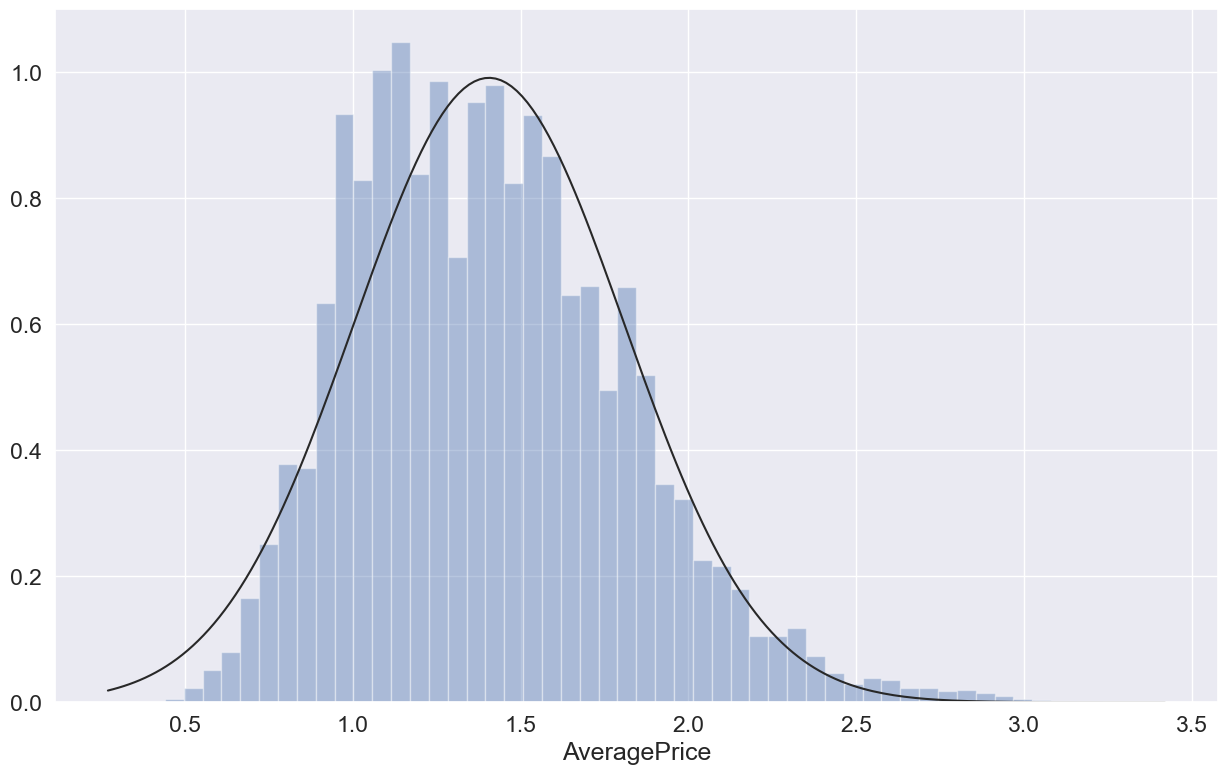

In [54]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=d3.AveragePrice, kde=False, fit=norm)

In [56]:
d3['region'].nunique()

54

In [58]:
d3['type'].nunique()

2

In [59]:
d3final=pd.get_dummies(d3.drop(['region','Date'],axis=1),drop_first=True)

In [60]:
X=d3final.iloc[:,1:14]
y=d3final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23297133291548192
MSE: 0.09108802805298698
RMSE: 0.3018079323891057


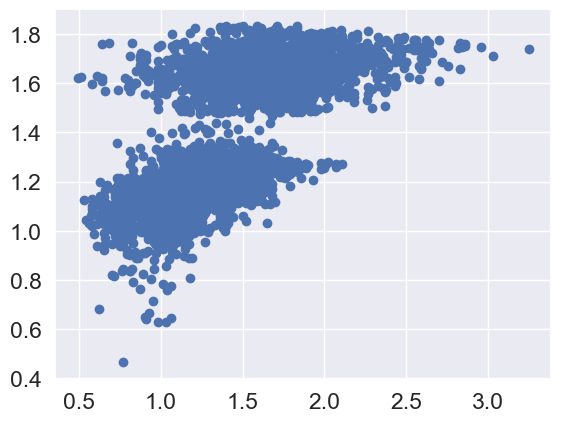

In [64]:
plt.scatter(x=y_test,y=pred)

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

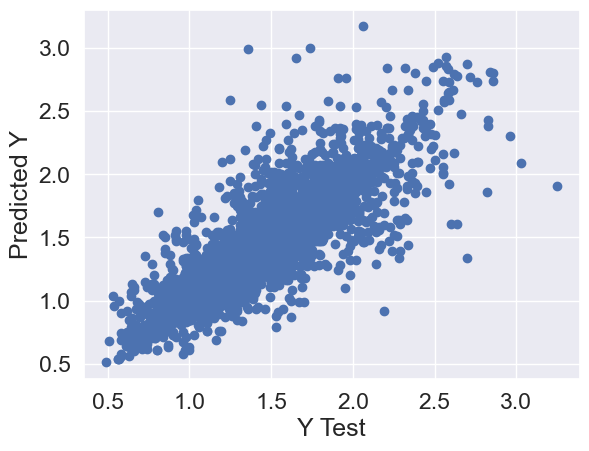

In [66]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1357972602739726
MSE: 0.04456838356164383
RMSE: 0.2111122534616213


In [68]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10050191780821915
MSE: 0.021296423638356158
RMSE: 0.14593294226580975


<Axes: xlabel='AveragePrice', ylabel='Density'>

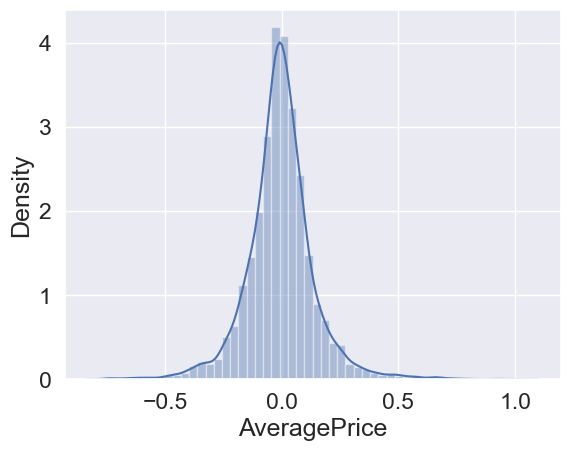

In [70]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
8604,0.82,0.9491
2608,0.97,0.9952
14581,1.44,1.3883
4254,0.97,0.9025
16588,1.45,1.4536


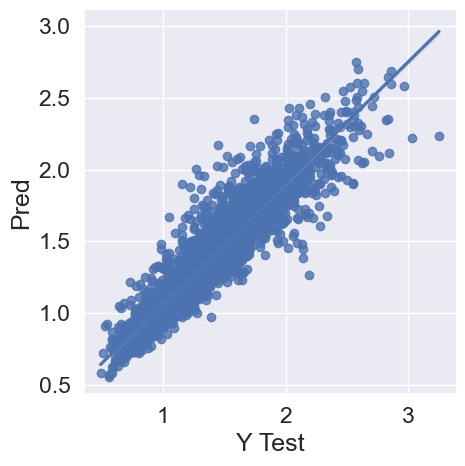

In [71]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# HR Analytics Project- Understanding the Attrition in HR

In [72]:
d4=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [73]:
d4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [76]:
d4.shape

(1470, 35)

In [79]:
d4.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [80]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [82]:
d4.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [99]:
d4=d4.convert_dtypes()

In [100]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   Int64 
 1   Attrition                 1470 non-null   string
 2   BusinessTravel            1470 non-null   string
 3   DailyRate                 1470 non-null   Int64 
 4   Department                1470 non-null   string
 5   DistanceFromHome          1470 non-null   Int64 
 6   Education                 1470 non-null   Int64 
 7   EducationField            1470 non-null   string
 8   EmployeeCount             1470 non-null   Int64 
 9   EmployeeNumber            1470 non-null   Int64 
 10  EnvironmentSatisfaction   1470 non-null   Int64 
 11  Gender                    1470 non-null   string
 12  HourlyRate                1470 non-null   Int64 
 13  JobInvolvement            1470 non-null   Int64 
 14  JobLevel                

In [105]:
numerical_cols = [feature for feature in d4.columns if d4[feature].dtypes!='object']
d4[numerical_cols].sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
47,37,No,Travel_Rarely,408,Research & Development,19,2,Life Sciences,1,61,...,1,80,0,8,1,3,1,0,0,0
554,27,No,Travel_Rarely,975,Research & Development,7,3,Medical,1,764,...,1,80,0,9,2,1,7,6,0,7
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2
1072,29,No,Travel_Frequently,410,Research & Development,2,1,Life Sciences,1,1513,...,3,80,3,4,3,3,3,2,0,2
